In [1]:
# Import libraries. You may or may not use all of these.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Import data
#!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset = pd.get_dummies(dataset)*1
dataset.tail()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1
1337,61,29.1,0,29141.36,1,0,0,1,0,1,0,0


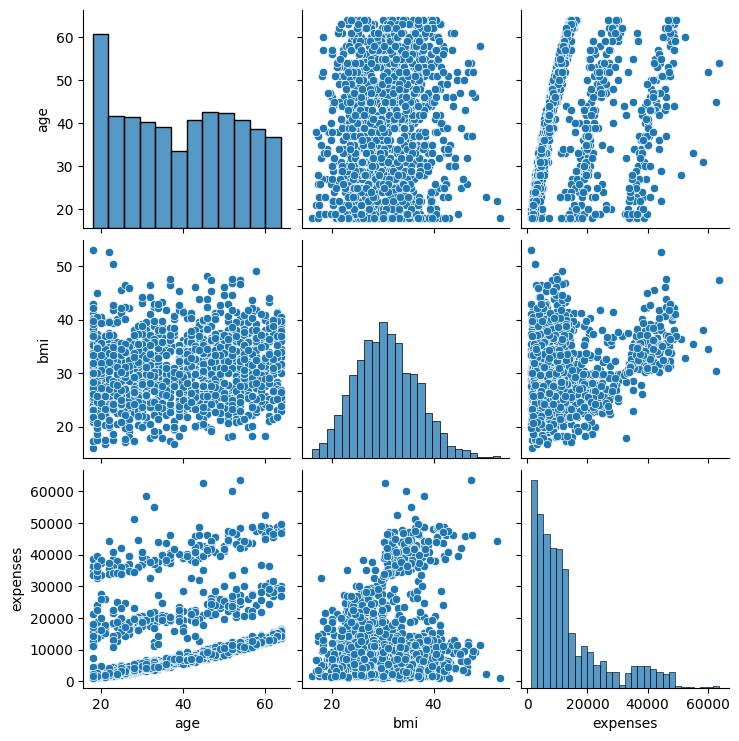

In [4]:
sns.pairplot(dataset[["age", "bmi", "expenses"]])

In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [6]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("expenses")
test_labels = test_features.pop("expenses")

In [7]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [8]:
def build_linear_model():
  linear_model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu', input_shape=[len(train_features.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(units=1)
  ])

  linear_model.compile(
    loss='mse',
    #optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    metrics=['mae', 'mse']
  )
  
  return linear_model


In [9]:
linear_model = build_linear_model()
linear_model.summary()

C:\Users\alber\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (1070, 11)             │            23 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23 (96.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23 (96.00 B)

In [10]:
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=1000,
    verbose=1,
    validation_split=0.2
)

Epoch 1/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 316031584.0000 - mae: 12939.7510 - mse: 316031584.0000 - val_loss: 363193280.0000 - val_mae: 14424.6328 - val_mse: 363193280.0000
Epoch 2/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 293622368.0000 - mae: 12682.7764 - mse: 293622368.0000 - val_loss: 362945344.0000 - val_mae: 14417.9189 - val_mse: 362945344.0000
Epoch 3/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 283794368.0000 - mae: 12436.5498 - mse: 283794368.0000 - val_loss: 362565600.0000 - val_mae: 14408.1094 - val_mse: 362565600.0000
Epoch 4/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 315106848.0000 - mae: 12976.0596 - mse: 315106848.0000 - val_loss: 362033600.0000 - val_mae: 14394.8340 - val_mse: 362033600.0000
Epoch 5/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 289716928.0000 - mae: 12493.8809 - mse: 289716928.0000 - val_loss: 361305440.0000 - val_mae: 14377.1777 - val_mse: 361305440.0000
Epoch 6/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

9/9 - 0s - 3ms/step - loss: 34318260.0000 - mae: 3380.7429 - mse: 34318260.0000
Testing set Mean Abs Error: 3380.74 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


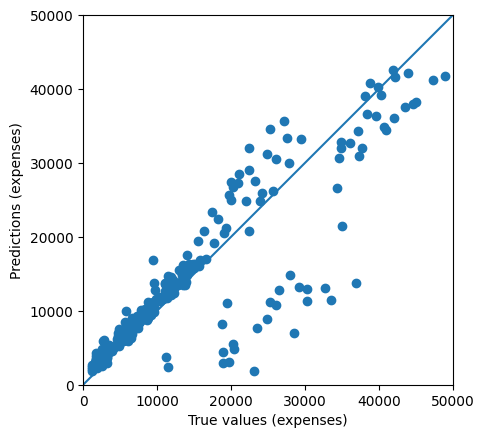

In [11]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = linear_model.evaluate(test_features, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
